In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
from pprint import pprint
import pyphi

import phial.toolbox as tb
import phial.node_functions as nf
import phial.experiment as ex
from phial.utils import tic,toc
from phial.experiment import Experiment
tic() # start tracking time of Notebook load

## From Larissa's 2015 paper https://www.mdpi.com/1099-4300/17/8/5472

In [2]:
import numpy as np
tpm=np.array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
cm=np.array([[1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1, 1]], dtype=np.uint8)
G = nx.DiGraph(cm)
net = tb.Net(edges=G.edges(), tpm=tpm)
net.info()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'nodes': ['A(0): 2,MJ_func',
  'B(1): 2,MJ_func',
  'C(2): 2,MJ_func',
  'D(3): 2,MJ_func',
  'E(4): 2,MJ_func',
  'F(5): 2,MJ_func'],
 'num_in_states': 64,
 'num_unreachable_states': 32,
 'num_state_cc': 4,
 'num_state_cycles': 4}

In [3]:
nx.DiGraph(pyphi.convert.state_by_node2state_by_state(net.tpm))

In [4]:
net.tpm

,A,B,C,D,E,F
000000,0.0,0.0,0.0,0.0,0.0,0.0
100000,1.0,1.0,0.0,0.0,0.0,0.0
010000,0.0,1.0,1.0,0.0,0.0,0.0
110000,1.0,0.0,1.0,0.0,0.0,0.0
001000,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
110111,0.0,0.0,1.0,1.0,0.0,0.0
001111,1.0,0.0,1.0,0.0,0.0,0.0
101111,0.0,1.0,1.0,0.0,0.0,0.0
011111,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
exp = Experiment([],
    net=net,
    title='High Phi in 6 nodes',
    comment='From Larissas 2015 paperm https://www.mdpi.com/1099-4300/17/8/5472',
    )

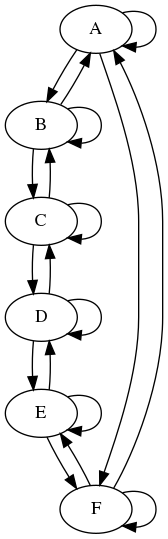

In [6]:
from IPython.display import Image
net.gvgraph('hifi.png')
Image(filename='hifi.png')

{'edges': [('A', 'A'), ('A', 'B'), ('A', 'F'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'B'), ('C', 'C'), ('C', 'D'), ('D', 'C'), ('D', 'D'), ('D', 'E'), ('E', 'D'), ('E', 'E'), ('E', 'F'), ('F', 'A'), ('F', 'E'), ('F', 'F')], 'nodes': ['A(0): 2,MJ_func', 'B(1): 2,MJ_func', 'C(2): 2,MJ_func', 'D(3): 2,MJ_func', 'E(4): 2,MJ_func', 'F(5): 2,MJ_func'], 'tpm':           A    B    C    D    E    F
000000  0.0  0.0  0.0  0.0  0.0  0.0
100000  1.0  1.0  0.0  0.0  0.0  0.0
010000  0.0  1.0  1.0  0.0  0.0  0.0
110000  1.0  0.0  1.0  0.0  0.0  0.0
001000  0.0  0.0  1.0  1.0  0.0  0.0
...     ...  ...  ...  ...  ...  ...
110111  0.0  0.0  1.0  1.0  0.0  0.0
001111  1.0  0.0  1.0  0.0  0.0  0.0
101111  0.0  1.0  1.0  0.0  0.0  0.0
011111  1.0  1.0  0.0  0.0  0.0  0.0
111111  0.0  0.0  0.0  0.0  0.0  0.0

[64 rows x 6 columns]}

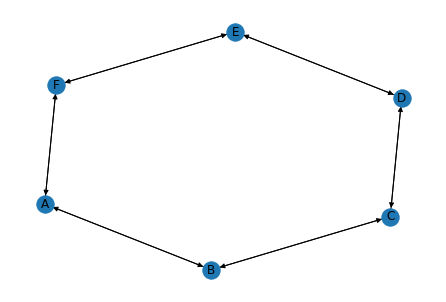

In [7]:
net.draw()

In [8]:
%time net.phi('000011')

CPU times: user 1.32 s, sys: 163 ms, total: 1.49 s
Wall time: 27.2 s


20.906248

In [9]:
exp.run()

In [10]:
exp.info()

{'timestamp': '2020-05-11 20:55:33.573490',
 'duration': 871.3565084829461,
 'results': {'000101': {'phi': 20.906248,
   'elapsed_seconds': 27.153772936901078},
  '100010': {'phi': 20.906248, 'elapsed_seconds': 27.60428892611526},
  '011101': {'phi': 20.906248, 'elapsed_seconds': 27.127627609996125},
  '010010': {'phi': 20.906248, 'elapsed_seconds': 27.743443369166926},
  '110000': {'phi': 20.906248, 'elapsed_seconds': 27.75584929296747},
  '011000': {'phi': 20.906248, 'elapsed_seconds': 27.406224041013047},
  '011110': {'phi': 20.906248, 'elapsed_seconds': 26.946432386990637},
  '001100': {'phi': 20.906248, 'elapsed_seconds': 27.113590268883854},
  '001111': {'phi': 20.906248, 'elapsed_seconds': 26.98037735093385},
  '111100': {'phi': 20.906248, 'elapsed_seconds': 27.29916600813158},
  '001001': {'phi': 20.906248, 'elapsed_seconds': 26.838781868107617},
  '010001': {'phi': 20.906248, 'elapsed_seconds': 27.095284102950245},
  '010100': {'phi': 20.906248, 'elapsed_seconds': 27.080246650

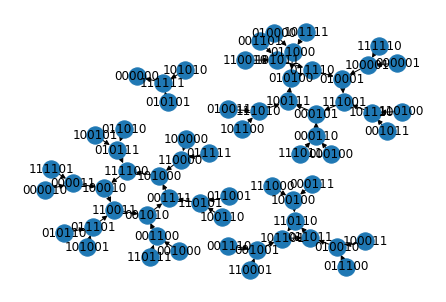

In [11]:
import pyphi.convert
import pandas as pd
tpm_sbs = pyphi.convert.state_by_node2state_by_state(tpm)
states = tb.all_states(len(net), backwards=True)
tpm_df = pd.DataFrame(tpm_sbs, index=states, columns=states)
tpm_df
S = nx.DiGraph(tpm_df)
nx.draw(S, pos=pydot_layout(S), with_labels=True)

In [12]:
[i for i,j in S.edges() if i==j]

['000000']

In [13]:
len(exp.net.unreachable_states)

32

In [14]:
len(exp.net.in_states)

64

In [15]:
exp.net.out_states

{'000000',
 '000011',
 '000101',
 '000110',
 '001001',
 '001010',
 '001100',
 '001111',
 '010001',
 '010010',
 '010100',
 '010111',
 '011000',
 '011011',
 '011101',
 '011110',
 '100001',
 '100010',
 '100100',
 '100111',
 '101000',
 '101011',
 '101101',
 '101110',
 '110000',
 '110011',
 '110101',
 '110110',
 '111001',
 '111010',
 '111100',
 '111111'}

In [16]:
nx.number_weakly_connected_components(S)

4

In [17]:
list(nx.simple_cycles(S))

[['000000'],
 ['110110', '101101', '011011'],
 ['010001', '111001', '000101', '100111', '010100', '011110'],
 ['110011', '001010', '001111', '101000', '111100', '100010']]

In [18]:
net.info()

{'edges': [('A', 'A'),
  ('A', 'B'),
  ('A', 'F'),
  ('B', 'A'),
  ('B', 'B'),
  ('B', 'C'),
  ('C', 'B'),
  ('C', 'C'),
  ('C', 'D'),
  ('D', 'C'),
  ('D', 'D'),
  ('D', 'E'),
  ('E', 'D'),
  ('E', 'E'),
  ('E', 'F'),
  ('F', 'A'),
  ('F', 'E'),
  ('F', 'F')],
 'nodes': ['A(0): 2,MJ_func',
  'B(1): 2,MJ_func',
  'C(2): 2,MJ_func',
  'D(3): 2,MJ_func',
  'E(4): 2,MJ_func',
  'F(5): 2,MJ_func'],
 'num_in_states': 64,
 'num_unreachable_states': 32,
 'num_state_cc': 4,
 'num_state_cycles': 4}

In [19]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')

Elapsed seconds=899.7107051201165
Completed on: 2020-05-11 21:10:05.765611
